In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [75]:
df = pd.read_csv('../01_data/krige_simul.csv', index_col=0)

In [76]:
df.drop('X', axis=1, inplace=True)

In [77]:
df

,lon,lat,result,pred.y
1,127.110338,37.326545,-0.128021,6.033161
2,127.128636,37.326805,0.132740,5.979743
3,127.138287,37.327985,-0.004535,5.897611
4,127.113721,37.323717,-0.231196,6.039869
5,127.100991,37.337090,0.041520,6.021627
...,...,...,...,...
2181,127.119109,37.107932,-0.044199,4.852769
2182,127.117433,37.103497,-0.036700,4.844064
2183,127.118027,37.107463,-0.041085,4.853944
2184,127.122919,37.110821,-0.041068,4.853143


In [78]:
df['result'] = -1 * df['result']
df = df[df['result'] > 0]

In [79]:
df

,lon,lat,result,pred.y
1,127.110338,37.326545,0.128021,6.033161
3,127.138287,37.327985,0.004535,5.897611
4,127.113721,37.323717,0.231196,6.039869
52,127.102378,37.327742,0.010575,6.022788
65,127.096466,37.322950,0.101573,6.003185
...,...,...,...,...
2181,127.119109,37.107932,0.044199,4.852769
2182,127.117433,37.103497,0.036700,4.844064
2183,127.118027,37.107463,0.041085,4.853944
2184,127.122919,37.110821,0.041068,4.853143


In [80]:
df['pred.y']=10**df['pred.y']

C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_29096\1734239176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred.y']=10**df['pred.y']


In [81]:
df['cost']=df['result']*df['pred.y']

C:\Users\kyeongtae\AppData\Local\Temp\ipykernel_29096\1828961359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cost']=df['result']*df['pred.y']


In [82]:
df

,lon,lat,result,pred.y,cost
1,127.110338,37.326545,0.128021,1.079346e+06,138178.859391
3,127.138287,37.327985,0.004535,7.899712e+05,3582.518198
4,127.113721,37.323717,0.231196,1.096148e+06,253425.199613
52,127.102378,37.327742,0.010575,1.053873e+06,11145.026403
65,127.096466,37.322950,0.101573,1.007360e+06,102320.665395
...,...,...,...,...,...
2181,127.119109,37.107932,0.044199,7.124744e+04,3149.046879
2182,127.117433,37.103497,0.036700,6.983350e+04,2562.889081
2183,127.118027,37.107463,0.041085,7.144041e+04,2935.127088
2184,127.122919,37.110821,0.041068,7.130871e+04,2928.500957


In [83]:
total_demand=df['result'].sum()

In [99]:
df=df.sort_values('cost',ascending=True)

In [100]:
df['demand_cumsum']=df['result'].cumsum()

In [101]:
df['cost_cumsum']=df['cost'].cumsum()

In [102]:
df['demand_cumsum']=total_demand-df['demand_cumsum']

In [103]:
df

,lon,lat,result,pred.y,cost,demand_cumsum,cost_cumsum
idx,,,,,,,
1420,127.205170,37.177310,0.000244,2.070616e+05,50.460196,9.942582e+01,5.046020e+01
1419,127.167775,37.252892,0.000149,6.843959e+05,102.204470,9.942567e+01,1.526647e+02
1418,127.205270,37.174885,0.000630,1.998219e+05,125.971041,9.942504e+01,2.786357e+02
1417,127.291715,37.152099,0.001538,8.682365e+04,133.530852,9.942350e+01,4.121666e+02
1416,127.204193,37.173136,0.000729,1.960197e+05,142.942998,9.942277e+01,5.551096e+02
...,...,...,...,...,...,...,...
4,127.059632,37.338498,0.482628,1.251361e+06,603941.419383,2.480863e+00,7.628704e+07
3,127.060107,37.341356,0.536682,1.207586e+06,648090.110051,1.944181e+00,7.693513e+07
2,127.060032,37.343648,0.602934,1.169282e+06,705000.113410,1.341247e+00,7.764013e+07


In [104]:
df['idx']=range(0,len(df))

In [105]:
df=df.set_index('idx')

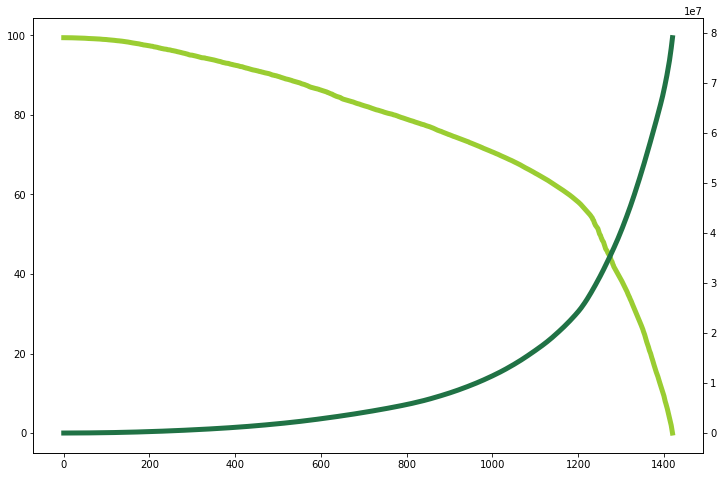

In [110]:

fig, ax1 = plt.subplots(figsize  = (12, 8))
ax1.plot(df['demand_cumsum'],linewidth="5",color='yellowgreen')

ax2 = ax1.twinx()
plt.plot(df['cost_cumsum'],linewidth="5",color='#207245')

plt.show()

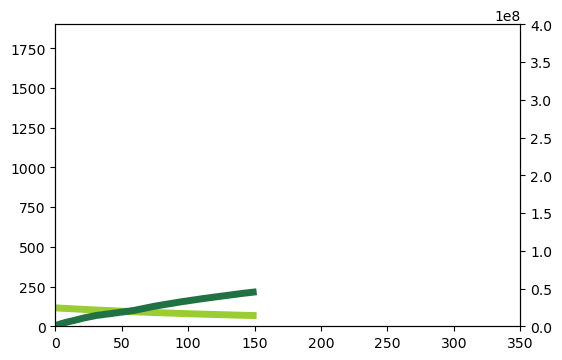

In [24]:
fig, ax1= plt.subplots(dpi=100)
ax1.plot(df.iloc[0:150,:]['demand_cumsum'],label='demand',linewidth="5",color='yellowgreen')
plt.xlim(0,350)
plt.ylim(0,1900)
ax2 = ax1.twinx()
plt.plot(df.iloc[0:150,:]['cost_cumsum'],label='cost',linewidth="5",color='#207245')
plt.ylim(0,400000000)

plt.show()